Harrison McGillen <br>
Undergraduate Research Results Computation <br>
Fall 2022 <br>
University of Montana, Geoscience <br> 

In [318]:
import pandas as pd
import numpy as np
import numpy.linalg as la
import scipy
import datetime as dt
import pdb
import matplotlib.pyplot as plt
import math
import plotly.graph_objects as go
#!pip install tabulate
#from tabulate import tabulate
myst_enable_extensions = [
    "amsmath",
    "colon_fence",
    "deflist",
    "dollarmath",
    "fieldlist",
    "html_admonition",
    "html_image",
    "linkify",
    "replacements",
    "smartquotes",
    "strikethrough",
    "substitution",
    "tasklist",
]

#function for determining a line of best fit
def bestfit(xx,yy,option):
    '''calculates best fit line and can output variables. for option: yhat = outputs
    best fit line, slope = outputs slope of the line, int = outputs y intercept'''
    xbar = xx.mean()
    ybar= yy.mean()
    sx = xx.std()
    sy = yy.std()
    r_xy = np.sum((xx-xbar)*(yy-ybar))/(np.sqrt(np.sum((xx-xbar)**2))*np.sqrt(np.sum((yy-ybar)**2)))
    me = r_xy * (sy / sx)
    be = ybar - me * xbar
    yhat = me*xx+be
    op = option
    if op == 'yhat':
        return yhat
    if op == 'slope':
        return me
    if op == 'int':
        return be

#Function for estalishing coverage percentage
def cov(foliage,total_d):
    coverage = foliage / total_d
    return coverage


In [319]:
#reading in some files

#this first one is for discharge data in West Glacier
disch_f = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/middlefork.txt'
disch_df =  pd.read_csv(disch_f,sep='\t',comment='#',
                       index_col='datetime',skiprows=[29],parse_dates=True)

rdict = {'82906_00060':'cfs'}
disch_df.rename(columns=rdict,inplace=True)
start = dt.datetime(2022,4,18)
end = dt.datetime(2022,9,30)

disch_df = disch_df.loc[(disch_df.index>=start) & (disch_df.index<=end)]

#reading in separate file because of bug issues

disch_f21 = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/middlefork21.txt'
disch_df21 =  pd.read_csv(disch_f21,sep='\t',comment='#',
                       index_col='datetime',skiprows=[28],parse_dates=True)

rdict = {'82906_00060':'cfs'}
disch_df21.rename(columns=rdict,inplace=True)
start2 = dt.datetime(2021,4,18)
end2 = dt.datetime(2021,9,30)

disch_df21 = disch_df21.loc[(disch_df21.index>=start2) & (disch_df21.index<=end2)]



#This second one is for Meteorological data in Nyack

cfile = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Met.dat'
clim_df = pd.read_csv(cfile,sep='\t',index_col='TIMESTAMP',skiprows=(0,2,3),parse_dates=True)
clim_df = clim_df.replace('\n','',regex=True)
clim_df = clim_df.loc[(clim_df.index>=start) & (clim_df.index<=end)]

clim_n = np.arange(0,len(clim_df.index),1)

avg_temp = bestfit(clim_n,clim_df['AirTC'],'yhat')

range1 = [i for i in range(0,365)]
clim_df['doy'] = clim_df.index.dayofyear

print(disch_df)
print(disch_df21)


                    agency_cd   site_no tz_cd   cfs 82906_00060_cd
datetime                                                          
2022-04-18 00:00:00      USGS  12358500   MDT  1870              A
2022-04-18 00:15:00      USGS  12358500   MDT  1870              A
2022-04-18 00:30:00      USGS  12358500   MDT  1870              A
2022-04-18 00:45:00      USGS  12358500   MDT  1860              A
2022-04-18 01:00:00      USGS  12358500   MDT  1860              A
...                       ...       ...   ...   ...            ...
2022-09-29 23:00:00      USGS  12358500   MDT   513              P
2022-09-29 23:15:00      USGS  12358500   MDT   513              P
2022-09-29 23:30:00      USGS  12358500   MDT   513              P
2022-09-29 23:45:00      USGS  12358500   MDT   513              P
2022-09-30 00:00:00      USGS  12358500   MDT   513              P

[15809 rows x 5 columns]
                    agency_cd   site_no tz_cd   cfs 82906_00060_cd
datetime                            

In [336]:
#Calculating Potential ET

#pulling mean air temp from climate data
means = clim_df.groupby(pd.Grouper(freq='1D')).mean()

#establishing given values
h = 964.1 #meters
T = means['AirTC'] #clim_n['AirTC']
A = 48.4950 #degrees
T_d = 3 #degrees c
T_m = T + 0.006*h

#calculations
E = ((700 * T_m /(100 - A)) + (15*(T-T_d)))/((80-T))
E = E.clip(lower=0)

#potential head gradient for August
ph_start = dt.datetime(2022,8,1)
ph_end = dt.datetime(2022,8,30)
ph_clim = E.loc[(E.index>=ph_start) & (E.index<=ph_end)]
#ph_clim = E

k = 400 #m/d
p_h = ph_clim/(k*1000) * 1000
#print(ph_clim, 'm/m')
#ph_clim.mean()
p_h.mean()

0.022161082129233792

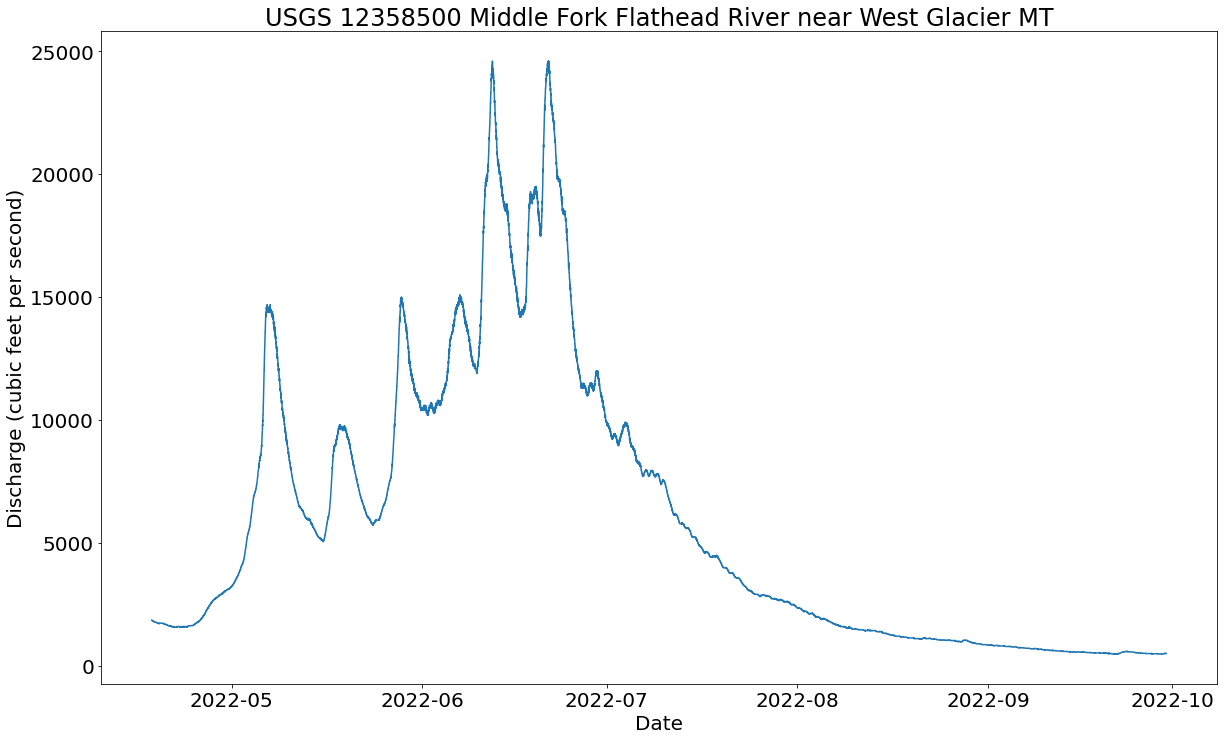

In [321]:
#Visualization of data so far

fig,ax = plt.subplots(figsize=(20,12))
plt.rcParams['font.size'] = '20'
plt.plot(disch_df.index, disch_df['cfs'])
#plt.plot(disch_df21.index, disch_df21['cfs'])
#plt.plot(clim_df.index,clim_df['AirTC']*100)
plt.xlabel('Date')
plt.ylabel('Discharge (cubic feet per second)')
plt.title('USGS 12358500 Middle Fork Flathead River near West Glacier MT')
plt.show()



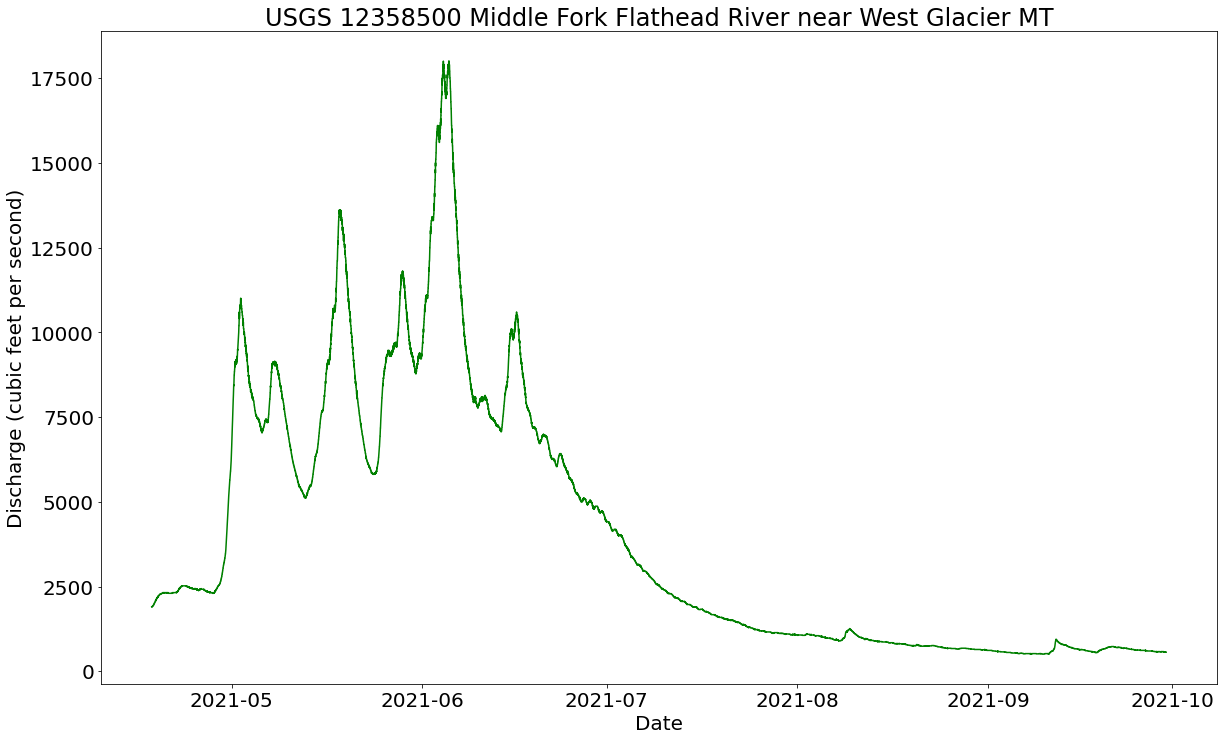

In [322]:
#data from 2021 read into different graph

fig,ax = plt.subplots(figsize=(20,12))
plt.rcParams['font.size'] = '20'
#plt.plot(disch_df.index, disch_df['cfs'])
plt.plot(disch_df21.index, disch_df21['cfs'], color='green')
#plt.plot(clim_df.index,clim_df['AirTC']*100)
plt.xlabel('Date')
plt.ylabel('Discharge (cubic feet per second)')
plt.title('USGS 12358500 Middle Fork Flathead River near West Glacier MT')
plt.show()


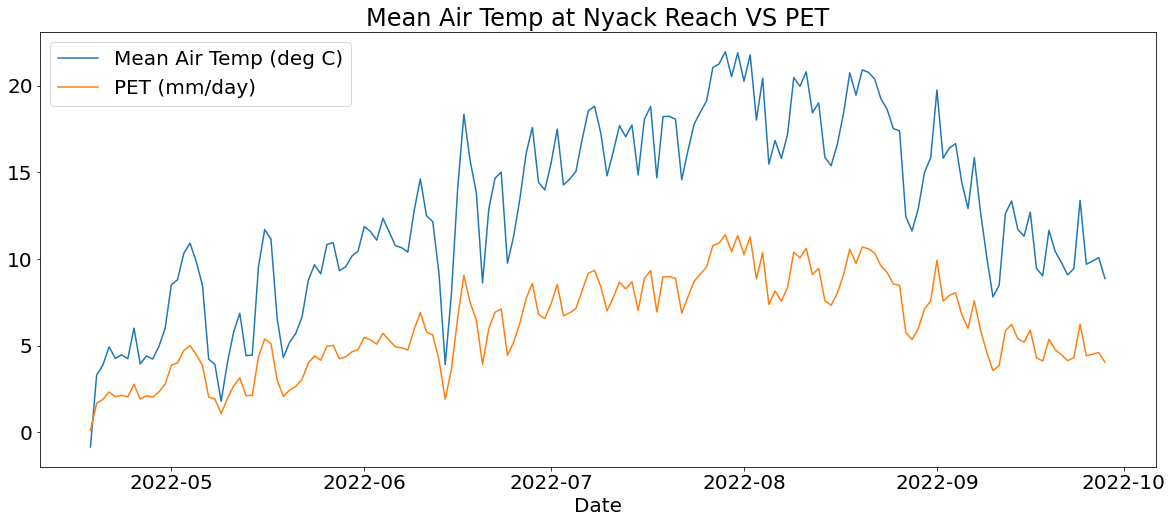

In [323]:
fig2,ax = plt.subplots(figsize=(20,8))
plt.rcParams['font.size'] = '20'
#plt.plot(clim_df.index,clim_df['AirTC'])
plt.plot(means.index,means['AirTC'],label="Mean Air Temp (deg C)")
plt.plot(means.index,E,label="PET (mm/day)")
plt.xlabel('Date')
#plt.ylabel('Mean Temperature (degrees C)')
ax.legend(loc="upper left")
plt.title("Mean Air Temp at Nyack Reach VS PET")
#plt.plot(clim_df.index,avg_temp,'b')
plt.show()

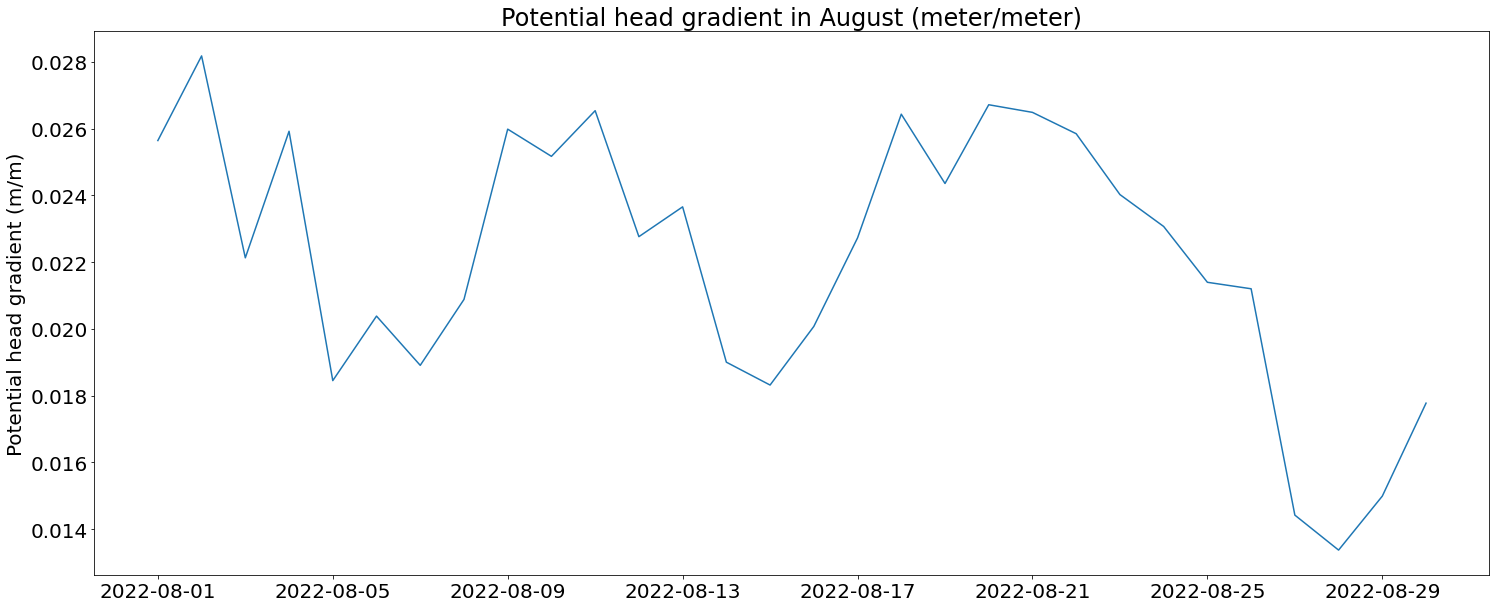

In [337]:
fig3,ax = plt.subplots(figsize=(25,10))
plt.plot(p_h.index,p_h)
plt.ylabel('Potential head gradient (m/m)')
plt.title('Potential head gradient in August (meter/meter)')
plt.show()

In [325]:
#Calculations for AET, a lot of these values will need revisited

lamb = 2.47e6 #j/kg^-1
delt = (4098*(0.6108**((17.27*clim_df['AirTC'])/(clim_df['AirTC']+237.3))))/((clim_df['AirTC']+237.3)**2)#slope of vapor pressure curve
delt = delt.groupby(pd.Grouper(freq='1D')).mean()
psyc = 0.665e-3       #psychometric constant

###calculations for net radiation###

#start with extraterrestrial radiation#
Gsc = 0.082 #(Mjm-2min-1) solar constant
dr1 = clim_df['doy'].groupby(pd.Grouper(freq='1D')).mean()
dr = 1 + (0.033*np.cos((((2*3.14)/365)*dr1))) #inverse relative distance Earth-Sun
temp = clim_df['AirTC'].groupby(pd.Grouper(freq='1D')).mean()
Rns = clim_df['SlrkW'] * 1000 # (J/s*m^2) net solar or net short wave radiation, direct measure 

Rn = clim_df['SlrkW'] * 3.6 # (MJ/s*m^2) #net radiation, assuming no longwave loss
Rn = Rn.groupby(pd.Grouper(freq='1D')).max()
k =  0.5         #light extinction coefficient
LAI = 4.0        #leaf area index
G = 0.1 * Rn  #soil heat flux
pa = 1.2      #air density (kgm^-2)
Cp = 1.01     #Specific heat of air (1.01 jkg^-1C^-1)
ea = (clim_df['RH']/100)
ea = ea.groupby(pd.Grouper(freq='1D')).mean()
#determining vapor pressure deficit, a bit more complicated
#need min and max daily temperatures
max1 = clim_df.groupby(pd.Grouper(freq='1D')).max()
max1 = max1['AirTC']
min1 = clim_df.groupby(pd.Grouper(freq='1D')).min()
min1 = min1['AirTC']

meanRH = clim_df.groupby(pd.Grouper(freq='1D')).mean()
meanRH = meanRH['RH']
eTmin = 0.6108**((17.27*min1)/(min1+237.3))
eTmax = 0.6108**((17.27*max1)/(max1+237.3))
esd = (eTmax+eTmin)/2 #mean saturation vp
ead = (meanRH/100)*esd #actual vp from relative humidity

D =  esd - ead     #vapor pressure deficit
#determining canopy resistance
hc = 2 #height of canopy(meters)
d = 0.67 * hc # zero plane displacement
z =  3  #where wind is measured, estimate and this should be checked#########
kv =  0.41     #von karman constant
z0 = 0.5    #roughness length, estimate and possible room for improvement
uh = clim_df['WindSpeed']
uh = uh.groupby(pd.Grouper(freq='1D')).mean()
ex = 0.4    #extinction coefficient
#step = (math.exp(-ex(1-(z/hc))))
uz = uh * (math.exp(-ex*(1-(z/hc))))    #wind velocity including extinction
ra =  (math.log((z-d)/(hc-d))*math.log((z-d)/z0))/((kv**2)*uz)              #aurodynamic resistance
W = 1         #soil water deficit
rs =  70        #surface resistance, s m-1
rc = 200        #canopy resistance, s m^-1

AET = ((delt*((Rn*math.exp(-k*LAI))-G)+(pa*Cp*(D/ra)))/((delt+psyc*(1+(rc/ra)))))

#AET_alt = ((0.408*delt*(Rn-G))+(psyc*(900/(temp+273))*(uh*D)))/(delt+(psyc*(1+0.34*uh)))

AETl = AET.loc[(AET.index>=ph_start) & (AET.index<=ph_end)]
AETl

TIMESTAMP
2022-08-01    2.025282
2022-08-02    2.422473
2022-08-03    2.022447
2022-08-04    2.512704
2022-08-05    2.128934
2022-08-06    2.150967
2022-08-07    1.447013
2022-08-08    1.421020
2022-08-09    1.727521
2022-08-10    0.897019
2022-08-11    1.116595
2022-08-12    0.928430
2022-08-13    1.173567
2022-08-14    1.462835
2022-08-15    1.360308
2022-08-16    1.325342
2022-08-17    1.358158
2022-08-18    1.605180
2022-08-19    1.263582
2022-08-20    1.610509
2022-08-21    1.012193
2022-08-22    1.204843
2022-08-23    1.608177
2022-08-24    1.576671
2022-08-25    0.870967
2022-08-26    1.119570
2022-08-27    0.832907
2022-08-28    0.905801
2022-08-29    0.962928
2022-08-30    0.925337
2022-08-31    0.976740
Freq: D, dtype: float64

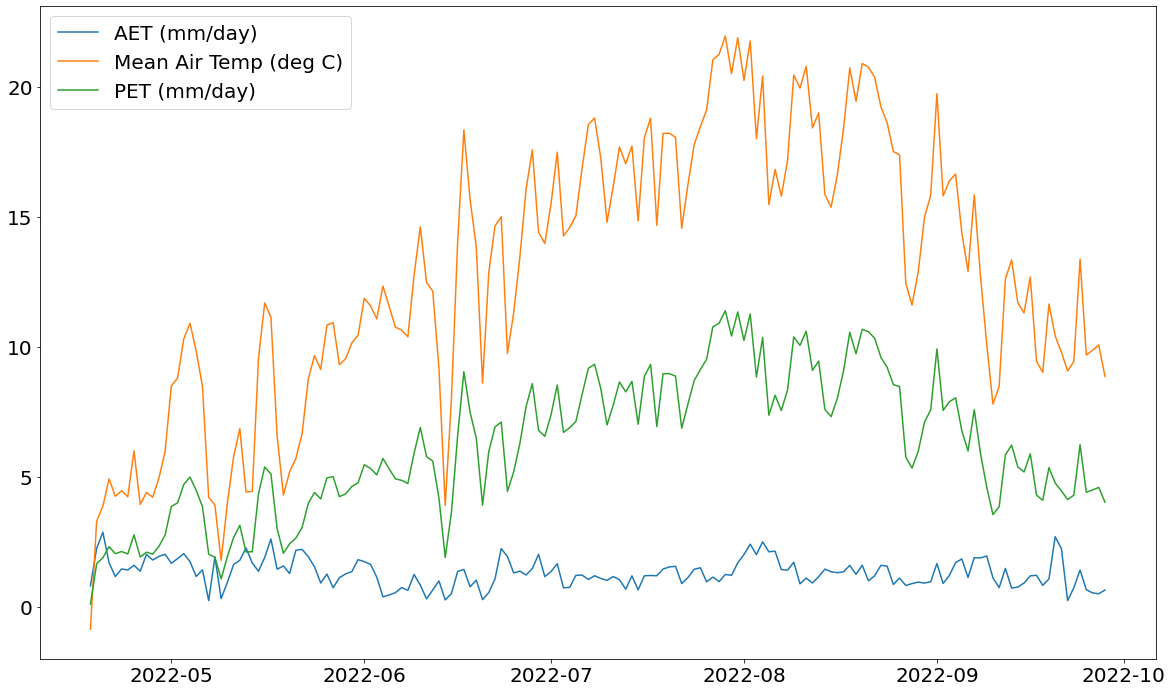

2.8804679229689647
11.398020451648303
21.96166666666667


In [350]:
fig4,ax = plt.subplots(figsize=(20,12))
plt.plot(AET.index, AET,label="AET (mm/day)")
plt.plot(means.index,means['AirTC'],label="Mean Air Temp (deg C)")
plt.plot(means.index,E,label="PET (mm/day)")
ax.legend(loc="upper left")
plt.show()

print(AET.max())
print(E.max())
print((means['AirTC']).max())

In [327]:
#Read in Peizo data


#hayfield bar higher elevation Peizo
hay_u = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Hayfield_U.csv'
hay_udf =  pd.read_csv(hay_u,sep=',',comment='#',
                       index_col='Date and Time',skiprows=[i for i in range(0,70)],parse_dates=True)
#hayfield bar lower elevation Peizo
hay_l = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Hayfield_L.csv'
hay_ldf = pd.read_csv(hay_l,sep=',',comment='#',
                       index_col='Date and Time',skiprows=[i for i in range(0,70)],parse_dates=True)

rdict = {'Depth (cm)                              ':'depth','Pressure (kPa)                          ':'pressure',
        'Temperature (C)                         ':'temp'}
hay_udf.rename(columns=rdict,inplace=True)
hay_ldf.rename(columns=rdict,inplace=True)

#movie road bar higher elevation peizo
mov_u = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Movie_U.csv'
mov_udf = pd.read_csv(mov_u,sep=',',comment='#',index_col='Date and Time',
                     skiprows=[i for i in range(0,70)],parse_dates=True)
#movie road bar lower elevation peizo
mov_l = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Movie_L.csv'
    
mov_ldf = pd.read_csv(mov_l,sep=',',comment='#',index_col='Date and Time',
                     skiprows=[i for i in range(0,70)],parse_dates=True)

mov_udf.rename(columns=rdict,inplace=True)
mov_ldf.rename(columns=rdict,inplace=True)

#Cabin road Peizo datat
cab_u = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Cabin_U.csv'
cab_udf = pd.read_csv(cab_u,sep=',',comment='#',
                       index_col='Date and Time',skiprows=[i for i in range(0,70)],parse_dates=True)

cab_l = 'https://raw.githubusercontent.com/Harry1496/Capstone-Code/main/Cabin_L.csv'
cab_ldf =  pd.read_csv(cab_l,sep=',',comment='#',
                       index_col='Date and Time',skiprows=[i for i in range(0,70)],parse_dates=True)

cab_udf.rename(columns=rdict,inplace=True)
cab_ldf.rename(columns=rdict,inplace=True)





$$
dh & = & h_1 - h_2 

$$

In [328]:

d_elev = 97-78 #change in elevation head, determined by change in depth measured
dh = ((d_elev)-(hay_udf['depth'] - (hay_ldf['depth'])))/100 #point measure dh/dl for upstream hayfield bar
dh = dh.groupby(pd.Grouper(freq='1D')).mean()

d_mov_elev = 91-62
dh_mov = ((d_mov_elev)-(mov_udf['depth'] - (mov_ldf['depth'])))/100 #point measure dh/dl for movieroad bar
dh_mov.groupby(pd.Grouper(freq='1D')).mean()

d_cab_elev = 115-91
dh_cab = ((d_cab_elev)-(cab_udf['depth'] - (cab_ldf['depth'])))/100
dh_cab.groupby(pd.Grouper(freq='1D')).mean()

print(dh.mean())
print(disch_df['cfs'].max())
print(disch_df['cfs'].min())
print(dh_mov.mean())
print(dh_cab.mean())


0.036381597432069104
24600
489
-0.1348828818845384
0.4595281931444445


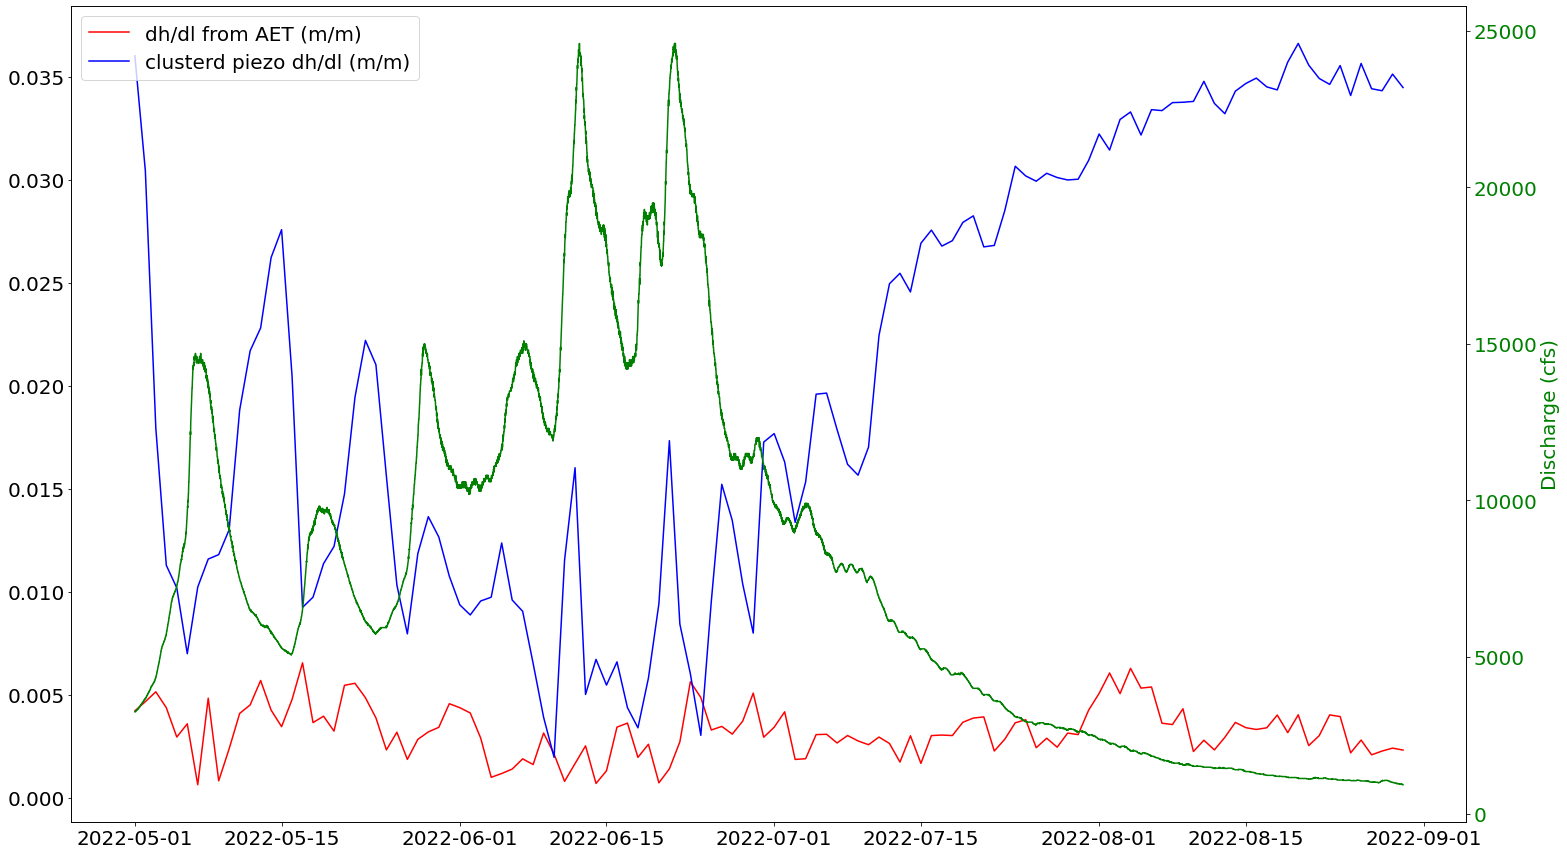

0.020864179474043704

In [329]:
#Calculating Potential dh/dl for AET

#potential head gradient for August
ph_start = dt.datetime(2022,5,1)
ph_end = dt.datetime(2022,8,30)
phA_clim = AET.loc[(AET.index>=ph_start) & (AET.index<=ph_end)]
p_h = p_h.loc[(p_h.index>=ph_start) & (p_h.index<=ph_end)]


dh_aug = dh.loc[(dh.index>=ph_start) & (dh.index<=ph_end)]
#dh_aug = dh_aug.groupby(pd.Grouper(freq='1D')).mean()

dhm_aug = dh_mov.loc[(dh_mov.index>=ph_start) & (dh_mov.index<=ph_end)]
dhm_aug = dhm_aug.groupby(pd.Grouper(freq='1D')).mean()
dhc_aug = dh_cab.loc[(dh_cab.index>=ph_start) & (dh_cab.index<=ph_end)]
dhc_aug = dhc_aug.groupby(pd.Grouper(freq='1D')).mean()

disch = disch_df['cfs']
disch = disch.loc[(disch.index>=ph_start) & (disch.index<=ph_end)]

k = 400 #m/d
pA_h = phA_clim/(k*1000) * 1000
#print(p_h, 'm/m')
#print(pA_h, 'm/m')

fig3,ax = plt.subplots(figsize=(25,15))
#plt.plot(p_h.index,p_h)
plt.plot(pA_h.index,pA_h,color='r',label='dh/dl from AET (m/m)')
#plt.plot(p_h.index,p_h)
plt.plot(dh_aug.index,dh_aug,color='b',label='clusterd piezo dh/dl (m/m)')
#plt.plot(dhc_aug.index,dhc_aug,label='clusterd piezo dh/dl (m/m)')


#plt.plot(dhm_aug.index,-dhm_aug,alpha=0.8,label='movie_rd')
#plt.plot(disch.index,disch,label='Discharge (cfs/5e5) ')
ax2 = ax.twinx()
ax2.plot(disch.index,disch,color='g',label='Discharge (cfs) ')
ax2.set_ylabel('Discharge (cfs)', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

#plt.plot(phA_clim.index, phA_clim)
#plt.ylabel('Potential head gradient (m/m)')
plt.title('')
ax.legend(loc="upper left")

plt.show()


dh_aug.mean()




#movie road piezometer is a recharge zone, would make sense for there to not be much effect from ET
#I'm not sure why it is consisten for the first part of the year, and then changes towards the end
#infiltration zone might be a better name, discharge vs recharge

#need to find another peizo placed in a discharge zone, since that would be the only one that could be impacted by ET


<Figure size 432x288 with 0 Axes>

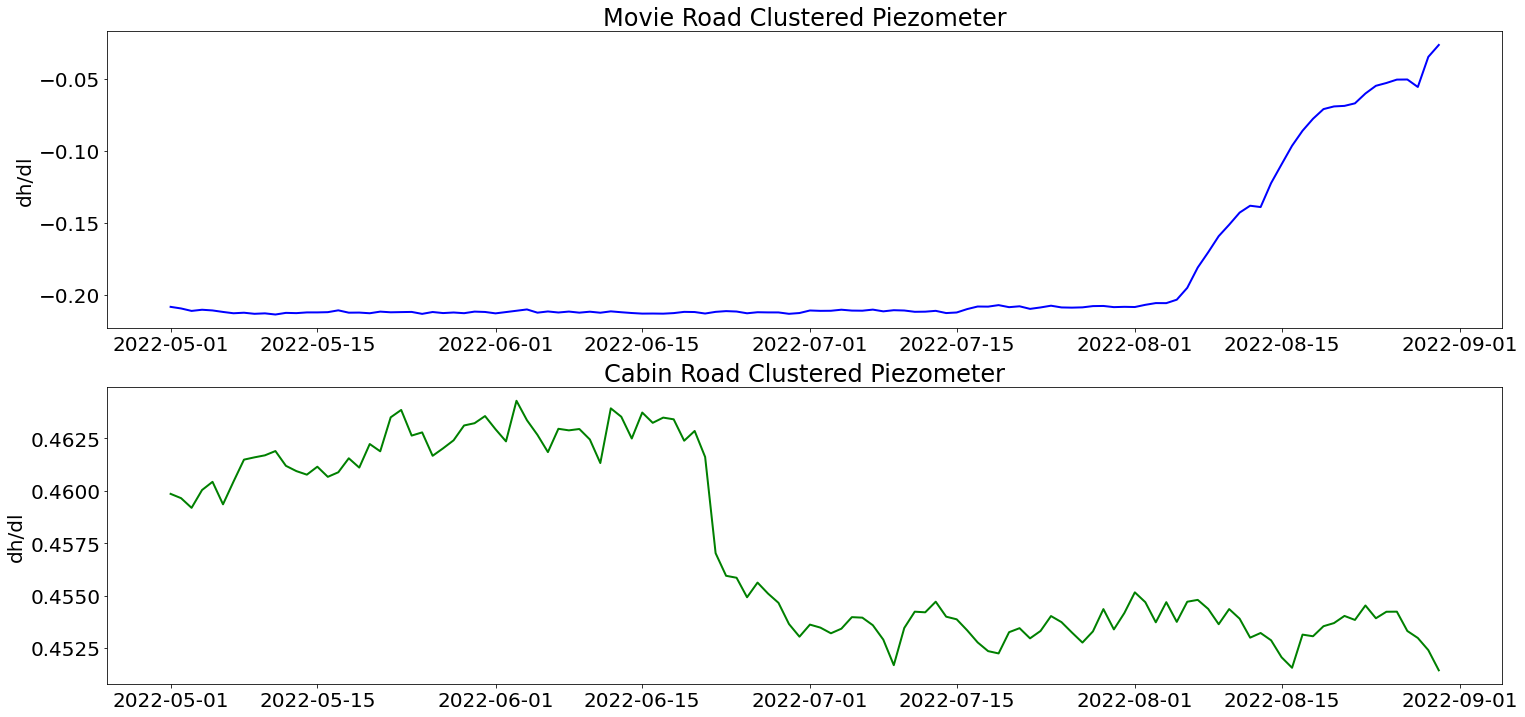

In [330]:



plt.figure()
f, axes = plt.subplots(2, 1,figsize=(25,12))
axes[0].plot(dhm_aug.index, dhm_aug,linewidth=2, color='blue')
axes[0].set_title('Movie Road Clustered Piezometer')
axes[0].set_ylabel('dh/dl')


axes[1].plot(dhc_aug.index, dhc_aug,linewidth=2, color='green')
axes[1].set_title('Cabin Road Clustered Piezometer')
axes[1].set_ylabel('dh/dl')
plt.show()

In [331]:
print(dhm_aug)

Date and Time
2022-05-01   -0.208318
2022-05-02   -0.209438
2022-05-03   -0.211143
2022-05-04   -0.210331
2022-05-05   -0.210814
                ...   
2022-08-26   -0.050285
2022-08-27   -0.050207
2022-08-28   -0.055413
2022-08-29   -0.034476
2022-08-30   -0.026190
Freq: D, Name: depth, Length: 122, dtype: float64


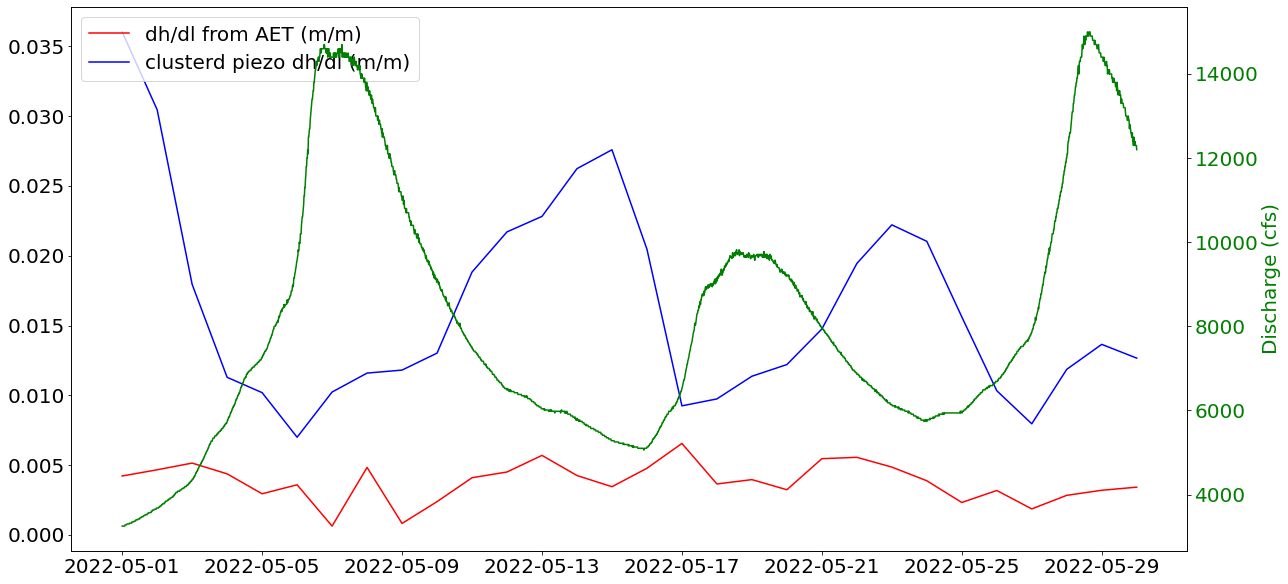

In [332]:
#fig = go.Figure()



#fig.add_trace(go.Scatter(dh,name=dh))

#fig.update_layout(autosize=False,width=700,height=500)

#Calculating Potential dh/dl for AET

#potential head gradient for August
ph_start = dt.datetime(2022,5,1)
ph_end = dt.datetime(2022,5,30)
phA_clim = AET.loc[(AET.index>=ph_start) & (AET.index<=ph_end)]
p_h = p_h.loc[(p_h.index>=ph_start) & (p_h.index<=ph_end)]


dh_aug = dh.loc[(dh.index>=ph_start) & (dh.index<=ph_end)]

disch = disch_df['cfs']
disch = disch.loc[(disch.index>=ph_start) & (disch.index<=ph_end)]

k = 400 #m/d
pA_h = phA_clim/(k*1000) * 1000
#print(p_h, 'm/m')
#print(pA_h, 'm/m')

fig3,ax = plt.subplots(figsize=(20,10))
#plt.plot(p_h.index,p_h)
plt.plot(pA_h.index,pA_h,color='r',label='dh/dl from AET (m/m)')
#plt.plot(p_h.index,p_h)
plt.plot(dh_aug.index,dh_aug,color='b',label='clusterd piezo dh/dl (m/m)')
#plt.plot(disch.index,disch,label='Discharge (cfs/5e5) ')
ax2 = ax.twinx()
ax2.plot(disch.index,disch,color='g',label='Discharge (cfs) ')
ax2.set_ylabel('Discharge (cfs)', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')


#plt.plot(phA_clim.index, phA_clim)
#plt.ylabel('Potential head gradient (m/m)')
plt.title('')
ax.legend(loc="upper left")

plt.show()



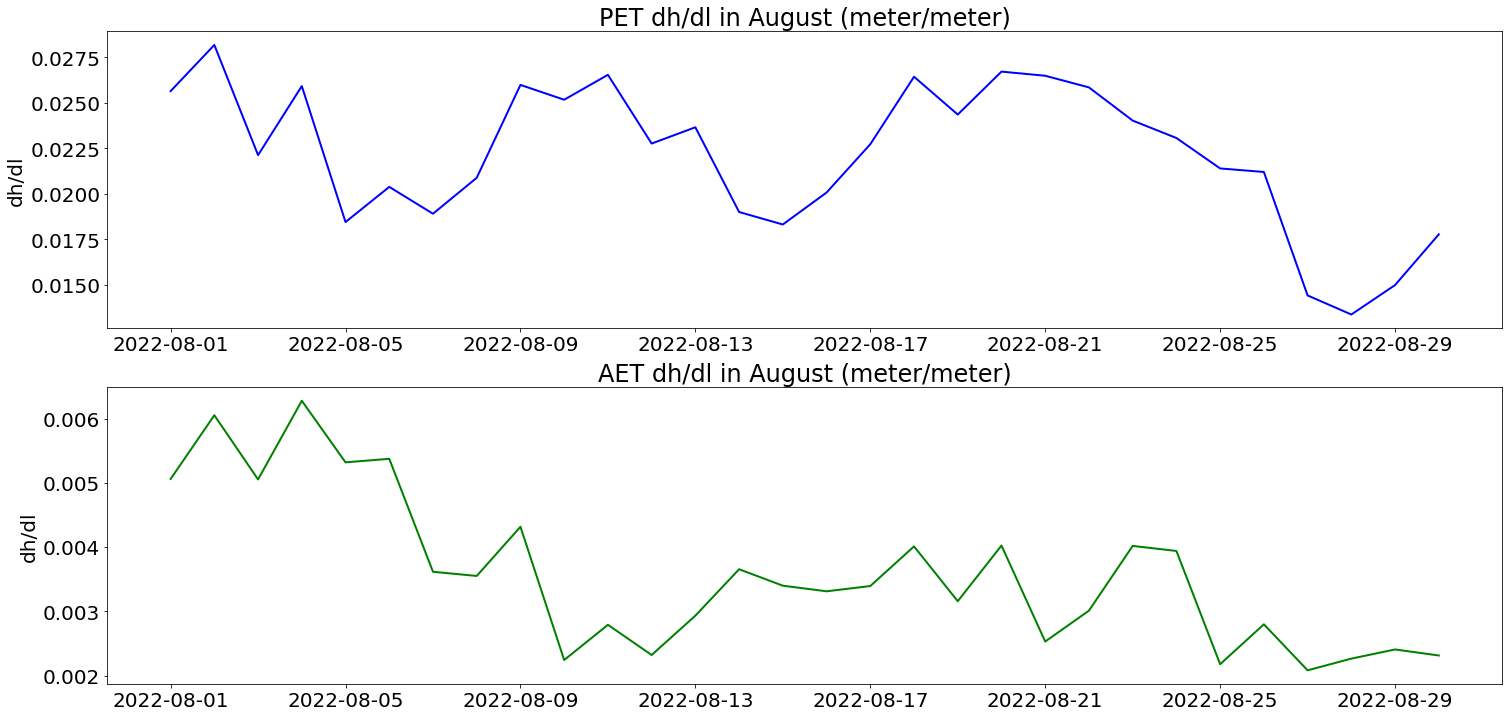

<function print>

In [342]:
ph_start = dt.datetime(2022,8,1)
ph_end = dt.datetime(2022,8,30)
phA_clim = AET.loc[(AET.index>=ph_start) & (AET.index<=ph_end)]

k = 400 #m/d
pA_h = phA_clim/(k*1000) * 1000

f, axes = plt.subplots(2, 1,figsize=(25,12))
axes[0].plot(p_h.index,p_h,linewidth=2, color='blue')
axes[0].set_title('PET dh/dl in August (meter/meter)')
axes[0].set_ylabel('dh/dl')


axes[1].plot(pA_h.index,pA_h,linewidth=2, color='green')
axes[1].set_title('AET dh/dl in August (meter/meter)')
axes[1].set_ylabel('dh/dl')
plt.show()

print

In [333]:
#Compilation of Results and Stat. significance
from scipy import stats

ph_start = dt.datetime(2022,8,1)
ph_end = dt.datetime(2022,8,30)
AET_aug = AET.loc[(AET.index>=ph_start) & (AET.index<=ph_end)] #AET for August
phA_aug =  AET_aug/(k*1000) * 1000 # Theoretical dh/dl from AET for August
ET_aug = E.loc[(E.index>=ph_start) & (E.index<=ph_end)] # PET for August
p_h_aug =  ET_aug/(k*1000) * 1000 #potential dh/dl from PET, for August
dh_aug = dh.loc[(dh.index>=ph_start) & (dh.index<=ph_end)] # observed dh/dl for August

print('PET',ET_aug.mean())
print('PET dh/dl',p_h_aug.mean())
print('AET',AET_aug.mean())
print('AET dh/dl',phA_aug.mean())
print('dh/dl obs',dh_aug.mean())


print(stats.ttest_ind(phA_aug,dh_aug))
print(stats.ttest_ind(dh_aug,phA_aug))




#stat significance




PET 8.864432851693513
PET dh/dl 0.022161082129233792
AET 1.432642596671748
AET dh/dl 0.0035816064916793697
dh/dl obs 0.034207868055555556
Ttest_indResult(statistic=-101.56007116550994, pvalue=4.9932828528401245e-67)
Ttest_indResult(statistic=101.56007116550994, pvalue=4.9932828528401245e-67)


In [334]:
#coverage percentages
def cov(foliage,total_d):
    coverage = foliage / total_d * 100
    return coverage

#Movie Road Bar
TS1_total = 53.88 #meters

TS1_m = (80+25+70+725+440+196)/100

print('movie rd bar coverage odered by transect number')
TS1_c = cov(TS1_m,TS1_total)
print('Transect coverage  = %.3f'%TS1_c,'%')

TS2_t = 92.14 #meters
TS2_m = (210+410+470+1120+260)/100
TS2_C = cov(TS2_m,TS2_t)
TS3_t = 109.76 #meters
TS3_m = (45+35+240+830)/100
TS3_C = cov(TS3_m,TS3_t)
TS4_t = 133.56
TS4_m = (1440+295+400+550)/100
TS4_C = cov(TS4_m,TS4_t)
TS5_t = 140.82
TS5_m = (290+770+790+190-340+300)/100
TS5_C = cov(TS5_m,TS5_t)

av_cov = (TS1_c+TS2_C+TS3_C+TS4_C+TS5_C)/5
print('average coverage = %.3f'%av_cov,'%')
print(TS2_C)
print(TS3_C)
print(TS4_C)
print(TS5_C)

#not sure how worth it is to calculate area and total output for this bar, since it only has a piezo at recharge zone


movie rd bar coverage odered by transect number
Transect coverage  = 28.508 %
average coverage = 20.020 %
26.807032776210114
10.477405247813412
20.10332434860737
14.2025280499929


In [335]:
#Hayfield bar

def cov2(abs,total_d):
    coverage = ((total_d-abs)/total_d) * 100
    return coverage

TS1_t = 115 #meters
TS1_m = (580+550+570+490+740+1800)/100
TS1_c = cov2(TS1_m,TS1_t)
TS2_t = 110
TS2_m = (280+1238+1040+932+1220)/100
TS2_c = cov2(TS2_m,TS2_t)
TS3_t = 97.9 
TS3_m = (940+1250)/100
TS3_c = cov2(TS3_m,TS3_t)
TS4_t = 151
TS4_m = (1100+470+620+560+520+380+1920+1050+380+510)/100
TS4_c =  cov2(TS4_m,TS4_t)
TS5_t = 152
TS5_m = (210+200+210+570+690+610+690+1290+680+1627)/100
TS5_c = cov2(TS5_m,TS5_t)
TS6_t = 170
TS6_m = (3365+860+570+1530+830)/100
TS6_c = cov2(TS6_m,TS6_t)


print('Hayfield bar coverage percentage ordered by transect number')
print(TS1_c)
print(TS2_c)
print(TS3_c)
print(TS4_c)
print(TS5_c)
print(TS6_c)

av_cov = (TS1_c+TS2_c+TS3_c+TS4_c+TS5_c+TS6_c)/6
print('average coverage = %.3f'%av_cov,'%')

hay_ac = (TS1_c + TS2_c + TS3_c + TS4_c + TS5_c + TS6_c)/6

hay_area = 89410 #square meters

#total AET for Q out of the different bars
xy = AET_aug.mean()/1000
Q = (xy) * hay_area *(hay_ac/100)
print('')
print('total AET out of hayfield bar = %.3f'%Q,'m^3 per day')


Hayfield bar coverage percentage ordered by transect number
58.869565217391305
57.18181818181818
77.6302349336057
50.264900662251655
55.41447368421053
57.91176470588235
average coverage = 59.545 %

total AET out of hayfield bar = 76.273 m^3 per day
